In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [42]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import KBinsDiscretizer


from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

C:\Users\Arina\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Область работы 2 (поиск лучшей модели)

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# Путь к тренировочному набору
# 

path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок !!!

In [3]:
df = pd.read_csv(path_train)
display(df.sample(10))
df.info()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
162,6510000,-1.406286,0.911167,1.429541,0.405623,-0.126718,1.763108,-1.472841,0.969005,-0.253184,...,1.497407,-0.554035,0.047278,1.421812,-0.608802,-0.805741,1.378217,-0.610923,1.472618,-0.478408
323,5810000,-0.091662,-0.365021,0.022811,0.405623,-0.126718,0.269048,0.695136,1.670737,-1.031363,...,-0.141322,-0.554035,0.047278,-0.570187,0.781257,-0.805741,1.378217,-0.144095,1.472618,-0.478408
155,3640000,-0.091662,0.803350,-0.401514,0.405623,0.054637,0.131888,0.063982,1.644886,-0.782025,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.881458,1.517692,-0.929397,0.912788,1.472618,1.307431
306,3850000,-1.406286,1.233551,0.923119,0.405623,-0.126718,-0.024866,-1.407416,1.693186,-1.640463,...,-0.141322,-0.554035,0.047278,-0.570187,0.530820,-0.805741,0.224410,-0.261321,1.472618,-0.478408
115,2940000,-0.091662,-0.549931,-0.770492,-2.465344,-0.126718,-0.024866,-1.432183,0.712030,-1.613859,...,-0.141322,-0.554035,0.047278,-0.570187,0.847430,0.355976,0.224410,0.191281,-0.679063,-0.478408
325,4480000,-0.091662,1.657077,-0.295432,0.405623,-0.177724,-0.024866,-0.426609,0.993330,1.318152,...,-0.141322,-0.554035,1.403419,-0.570187,0.489016,1.517692,0.224410,-0.011985,1.472618,-0.478408
224,5810000,-0.091662,0.239779,0.312459,0.405623,0.569234,1.178220,0.940877,0.320965,1.380543,...,-0.141322,-0.554035,1.403419,-0.570187,-0.463616,-0.805741,2.532024,-1.411521,-0.679063,3.093270
246,2800000,1.222962,0.780511,-1.153307,0.405623,-0.126718,-0.024866,-0.482007,-1.348592,-0.550786,...,-0.141322,-0.554035,0.047278,-0.570187,-0.959543,0.355976,0.224410,-0.968441,-0.679063,-0.478408
216,2233000,1.222962,0.442552,0.068934,-2.465344,-0.126718,-0.367765,-1.072266,1.790334,0.512101,...,-0.141322,1.804941,0.047278,-0.570187,1.621653,-0.805741,-0.929397,-0.950147,1.472618,-0.478408
57,3500000,1.222962,1.376785,-0.770492,-2.465344,-0.126718,0.523773,-0.654188,0.807907,0.134579,...,-0.141322,-0.554035,0.047278,-0.570187,-0.485363,-0.805741,-0.929397,0.691439,1.472618,-0.478408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

In [4]:
df.describe()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
count,4.080000e+02,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.737224e+06,0.021112,-0.003301,-0.011893,0.018605,0.028544,0.038168,-0.023595,-0.001552,-0.006136,...,0.007289,-0.051018,0.014040,-0.013599,-0.064105,-0.034111,0.037765,-0.040639,0.001248,-0.040703
std,1.865673e+06,0.992535,0.998581,0.977707,0.981679,0.998079,0.956908,1.018189,1.005549,0.992948,...,1.013391,0.967405,0.991954,1.017292,0.935958,1.005660,1.005871,0.997217,1.001723,0.967634
min,1.750000e+06,-1.406286,-1.790865,-1.591469,-2.465344,-3.986188,-5.413279,-1.837623,-1.648222,-1.771244,...,-3.418780,-0.554035,-2.665004,-0.570187,-1.369020,-0.805741,-0.929397,-1.657159,-0.679063,-4.050087
25%,3.430000e+06,-0.091662,-0.901293,-0.701308,0.405623,-0.126718,-0.024866,-0.868979,-0.865484,-0.840225,...,-0.141322,-0.554035,0.047278,-0.570187,-0.694949,-0.805741,-0.929397,-0.925067,-0.679063,-0.478408
50%,4.329500e+06,-0.091662,0.002391,-0.272371,0.405623,-0.126718,-0.024866,-0.011371,-0.027759,-0.014453,...,-0.141322,-0.554035,0.047278,-0.570187,-0.242940,-0.805741,0.224410,-0.106249,-0.679063,-0.478408
75%,5.740000e+06,1.222962,0.909385,0.504098,0.405623,0.058888,0.311665,0.882608,0.847563,0.816233,...,-0.141322,-0.554035,0.047278,1.421812,0.379395,0.355976,0.224410,0.814362,1.472618,-0.478408
max,1.330000e+07,1.222962,1.665706,5.096263,0.405623,13.021551,4.246676,1.670364,1.790334,1.777808,...,9.691053,1.804941,4.115701,5.405809,5.162983,2.679409,2.532024,1.741964,1.472618,3.093270


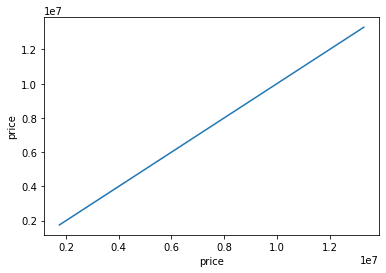

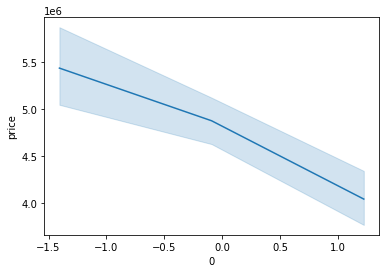

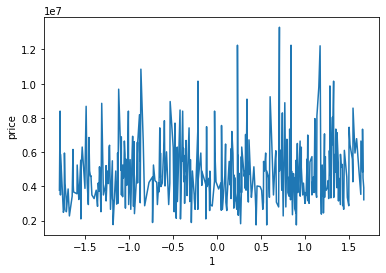

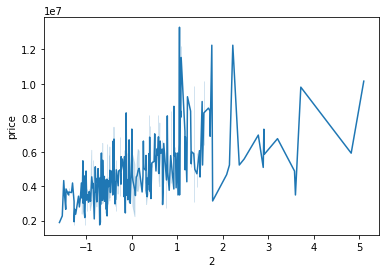

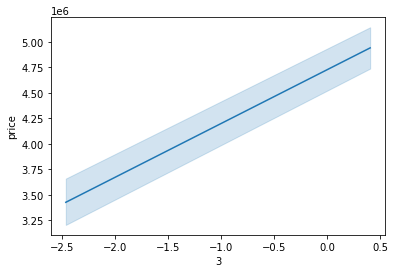

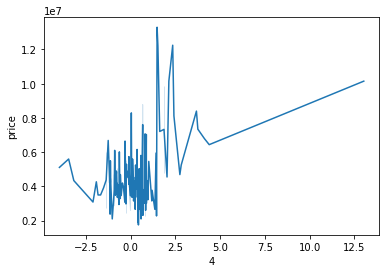

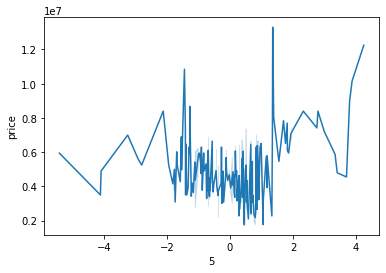

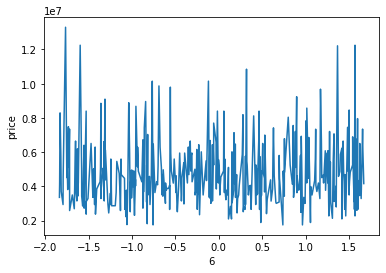

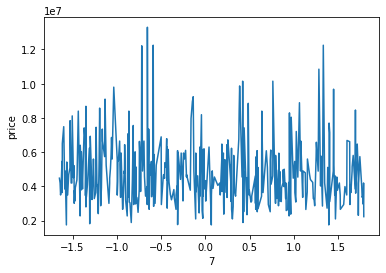

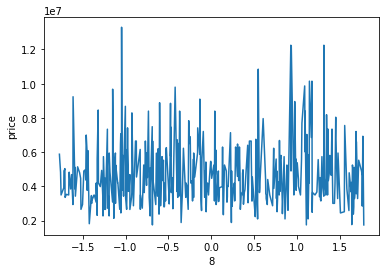

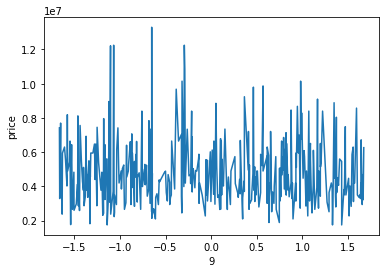

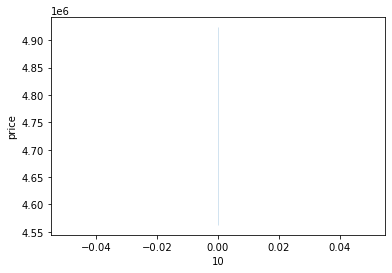

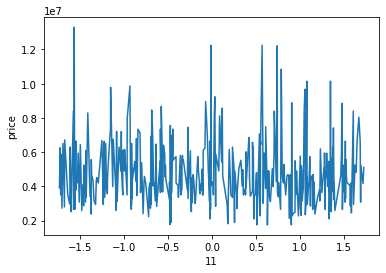

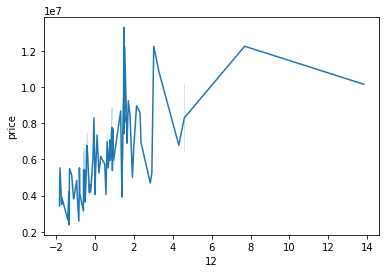

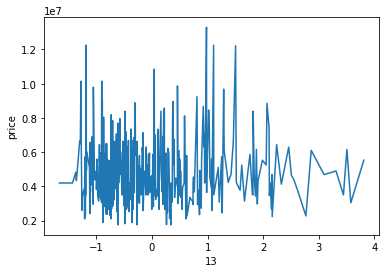

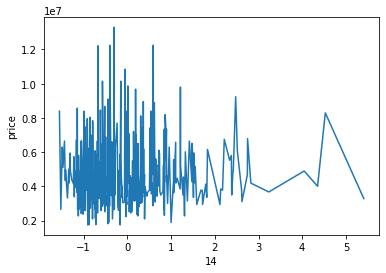

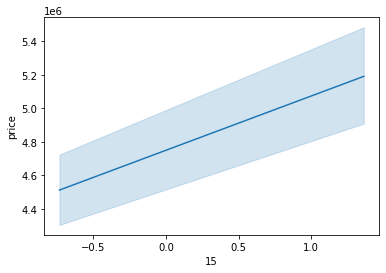

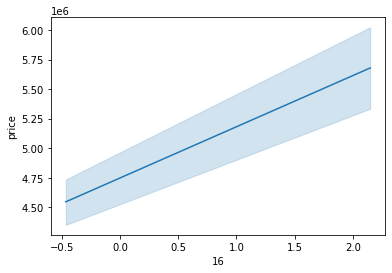

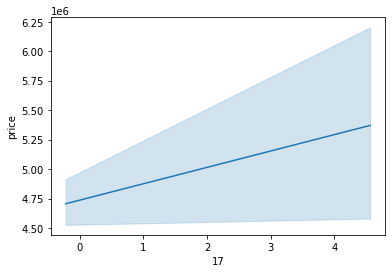

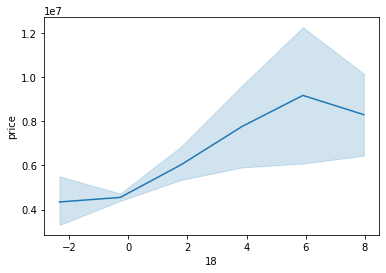

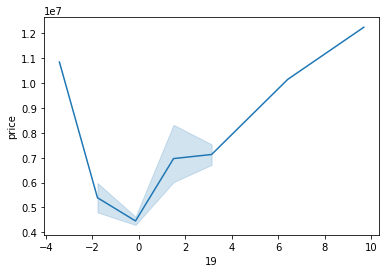

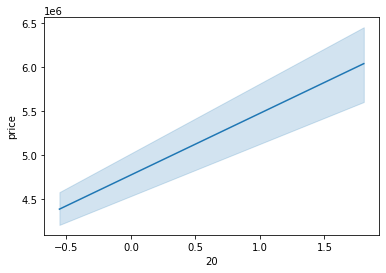

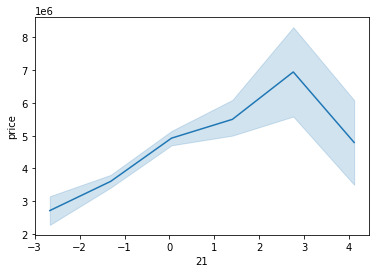

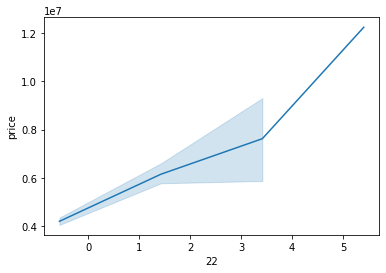

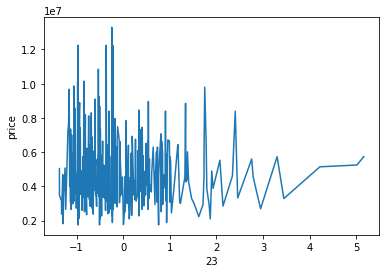

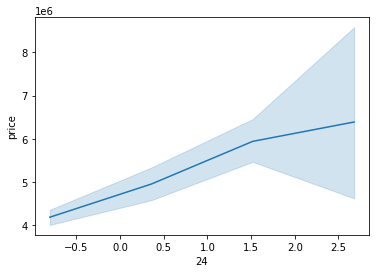

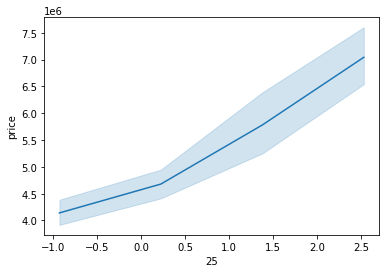

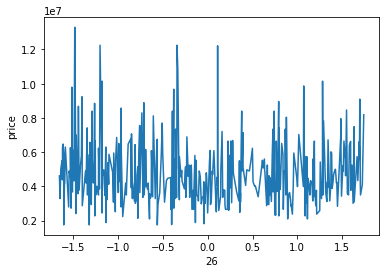

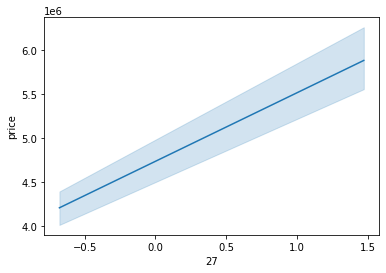

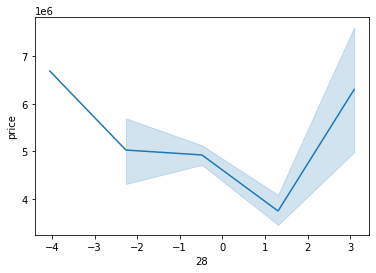

In [5]:
for i in df.columns:
    sns.lineplot(x = i, y = 'price', data = df)
    plt.show()

In [6]:
y = np.array(df.price)
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y)

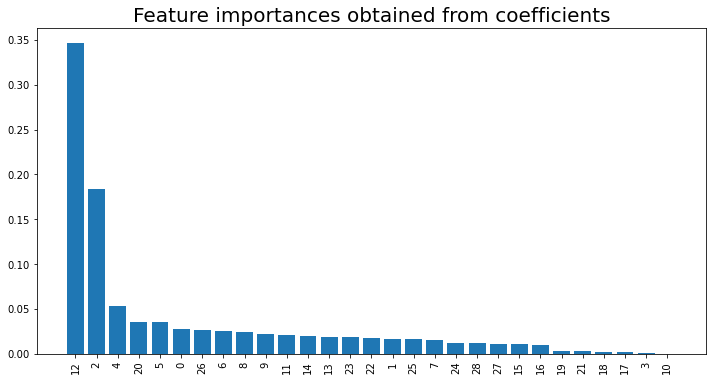

In [7]:
model = RandomForestRegressor(n_estimators=500, random_state=42)

model.fit(X_train, y_train)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12,6))
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
selected_features = importances.index
selected_features = selected_features[0:19]
selected_features

Index([12, 2, 4, 20, 5, 0, 26, 6, 8, 9, 11, 14, 13, 23, 22, 1, 25, 7, 24], dtype='int64')

In [29]:
ct = ColumnTransformer([
        ("select", StandardScaler(), selected_features)
        ])

In [30]:
rf_model = make_pipeline(ct, RandomForestRegressor())
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print('mape: ', mean_absolute_percentage_error(y_test,rf_pred))

mape:  0.21780708249786976


In [31]:
rf_model = make_pipeline(ct, RandomForestRegressor(max_features= 12, min_samples_leaf= 3, n_estimators= 400))
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print('mape: ', mean_absolute_percentage_error(y_test,rf_pred))

mape:  0.21334203542798522


In [32]:
rf_model = make_pipeline(ct, RandomForestRegressor(n_estimators=1000, max_features=20))
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print('mape: ', mean_absolute_percentage_error(y_test,rf_pred))

mape:  0.2166537617326804


### Область работы 3 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 3 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = ... # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = ... # содержит только имя файла, без имен папок

In [6]:
# Блок(и) обучения и поверки модели

In [7]:
# Блок предсказания с использованием тестового набора

In [ ]:
# Маска отобраных номеров строк для предсказания из тестового набора
mask =
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict =